<a href="https://colab.research.google.com/github/rladbstj56/2024_PythonDataAnalysis/blob/main/241116%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

hw = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/hw_data2.csv')
print(hw.head())
hw = hw.drop('id',axis = 1, inplace = False)
print(hw.head())

   Unnamed: 0        id  age        Dept location education  \
0           0    HR8270   28          HR   Suburb        PG   
1           1  TECH1860   50  Technology   Suburb        PG   
2           2  TECH6390   43  Technology   Suburb        UG   
3           3   SAL6191   44       Sales     City        PG   
4           4    HR6734   33          HR     City        UG   

     recruitment_type  job_level  rating  onsite  awards  certifications  \
0            Referral          5       2       0       1               0   
1             Walk-in          3       5       1       2               1   
2            Referral          4       1       0       2               0   
3           On-Campus          2       3       1       0               0   
4  Recruitment Agency          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1  
   Unnamed: 0  age        

In [7]:
x = hw.drop('satisfied', axis=1, inplace=False)
y = hw['satisfied']

In [8]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   age               500 non-null    int64 
 2   Dept              500 non-null    object
 3   location          500 non-null    object
 4   education         500 non-null    object
 5   recruitment_type  500 non-null    object
 6   job_level         500 non-null    int64 
 7   rating            500 non-null    int64 
 8   onsite            500 non-null    int64 
 9   awards            500 non-null    int64 
 10  certifications    500 non-null    int64 
 11  salary            500 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 47.0+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: satisfied
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
label_encoder = preprocessing.LabelEncoder()
for feature in ['Dept','location','education','recruitment_type']:
  x[feature] = label_encoder.fit_transform(x[feature])
  print(label_encoder.classes_)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

['HR' 'Marketing' 'Purchasing' 'Sales' 'Technology']
['City' 'Suburb']
['PG' 'UG']
['On-Campus' 'Recruitment Agency' 'Referral' 'Walk-in']


In [10]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
print(x_train_std)
print(x_test_std)

[[ 0.00692641  0.90174776 -1.40282371 ...  1.5252376  -1.00501256
  -0.3753595 ]
 [ 1.31742529  1.64721387  0.01238306 ... -1.59102537  0.99501244
   0.60624186]
 [-1.63119718 -1.44114574  0.71998644 ... -0.20601961 -1.00501256
   1.49257361]
 ...
 [ 0.71203178  0.68875744  1.42758983 ... -0.55227105 -1.00501256
  -0.90686359]
 [ 1.33166984 -0.26969899  0.71998644 ...  1.17898616  0.99501244
   0.60624186]
 [-1.04004823 -1.12166026  0.01238306 ...  0.14023183 -1.00501256
   1.49257361]]
[[ 0.66436972 -1.45336607 -1.32093365 ...  1.37576472 -0.94169658
  -0.98907752]
 [-1.14737613  0.32157812 -0.61830937 ... -0.86125108 -0.94169658
  -0.18967214]
 [ 0.74614991 -1.55777455  0.7869392  ... -0.86125108  1.06191317
  -0.18967214]
 ...
 [-1.13479456 -0.51368973 -0.61830937 ... -1.60692302  1.06191317
   1.74231499]
 [ 1.1487601  -0.30487277 -0.61830937 ...  0.25725682 -0.94169658
  -0.98907752]
 [-1.51224161  1.15684598  0.08431491 ...  0.63009278 -0.94169658
   1.74231499]]


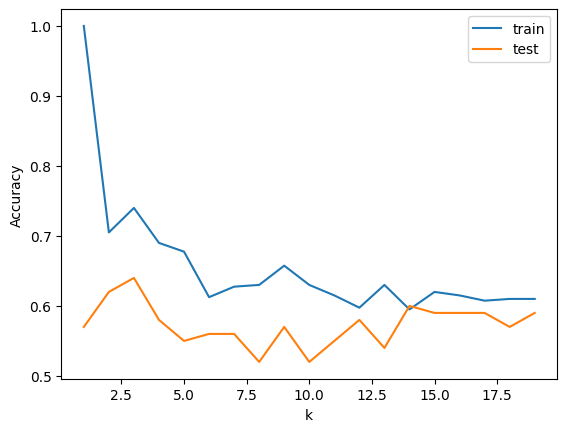

In [11]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,20)
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train_std,y_train)
  score = knn.score(x_train_std,y_train)
  train_accuracy.append(score)
  score = knn.score(x_test_std,y_test)
  test_accuracy.append(score)
plt.plot(neighbors,train_accuracy,label='train')
plt.plot(neighbors,test_accuracy,label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # k = 3 or 14

In [12]:
k = 3 # 최적 k
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train_std,y_train)
y_pred = knn.predict(x_test_std)
print(y_pred)

[1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1]


In [13]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
print(cf)
print(knn.score(x_test_std,y_test))
y_pred = knn.predict(x_test_std)
print('score',accuracy_score(y_test,y_pred))

[[26 21]
 [15 38]]
0.64
score 0.64


In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cf = confusion_matrix(y_test,y_pred)
print(cf)
print(model.score(x_test,y_test))

[[19 28]
 [20 33]]
0.52


In [15]:
model.fit(x_train_std,y_train)
y_pred = model.predict(x_test_std)
cf = confusion_matrix(y_test,y_pred)
print(cf)
print(model.score(x_test_std,y_test))

[[18 29]
 [21 32]]
0.5
